# Quantum Error Correction 

## ECE TUC Autumn 2022 Introduction to Quantum Computers Course
## Athanasios Karakos 

In [6]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
from qiskit.quantum_info import Statevector
from numpy import pi
import random
sim = Aer.get_backend('aer_simulator')

3-QUBIT BIT FLIP CODE

In [7]:
def bit_flip_encode(qc):
    qc.cx(init[0],aq[0])
    qc.cx(init[0],aq[1])
    qc.barrier()
    return qc
def error_area(qc):
    p = 0.8
    pc = random.random()
    if pc < p:
        qc.x(random.choice([aq[0],aq[1],init[0]]))
        qc.barrier()
    return qc
def bit_flip_syndrome(qc):
    qc.cx(init[0],sq[0])
    qc.cx(aq[0],sq[0])
    qc.cx(aq[0],sq[1])
    qc.cx(aq[1],sq[1])
    qc.barrier()
    qc.measure(sq[0],sb[0])
    qc.measure(sq[1],sb[1])
    qc.barrier()
    return qc
def bit_flip_correct(qc):
    ############################################
    zeros = QuantumCircuit(2,2)
    zeros.measure(0,0)
    zeros.measure(1,1)
    qobj = assemble(zeros)
    count00 = sim.run(qobj).result().get_counts()
    ###########################################
    zerone = QuantumCircuit(2,2)
    zerone.x(1)
    zerone.measure(0,0)
    zerone.measure(1,1)
    qobj = assemble(zerone)
    count01 = sim.run(qobj).result().get_counts()
    ###########################################
    onezero = QuantumCircuit(2,2)
    onezero.x(0)
    onezero.measure(0,0)
    onezero.measure(1,1)
    qobj = assemble(onezero)
    count10 = sim.run(qobj).result().get_counts()
    ###########################################
    ones = QuantumCircuit(2,2)
    ones.x(0)
    ones.x(1)
    ones.measure(0,0)
    ones.measure(1,1)
    qobj = assemble(ones)
    count11 = sim.run(qobj).result().get_counts()
    ###########################################
    temp = qc
    qobj = assemble(temp)
    counts = sim.run(qobj).result().get_counts() 
    if counts == count00:
        pass
    elif counts == count01:
        qc.x(aq[1])
        qc.barrier()
    elif counts == count10:
        qc.x(init[0])
        qc.barrier()
    elif counts == count11:
        qc.x(aq[0])
        qc.barrier()
    else:
        pass
        
    return qc

C:\Users\thano\AppData\Local\Temp\ipykernel_18472\1535608786.py:29: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  count00 = sim.run(qobj).result().get_counts()
C:\Users\thano\AppData\Local\Temp\ipykernel_18472\1535608786.py:36: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  count01 = sim.run(qobj).result().get_counts()
C:\Users\thano\AppData\Local\Temp\ipykernel_18472\1535608786.py:43: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.r

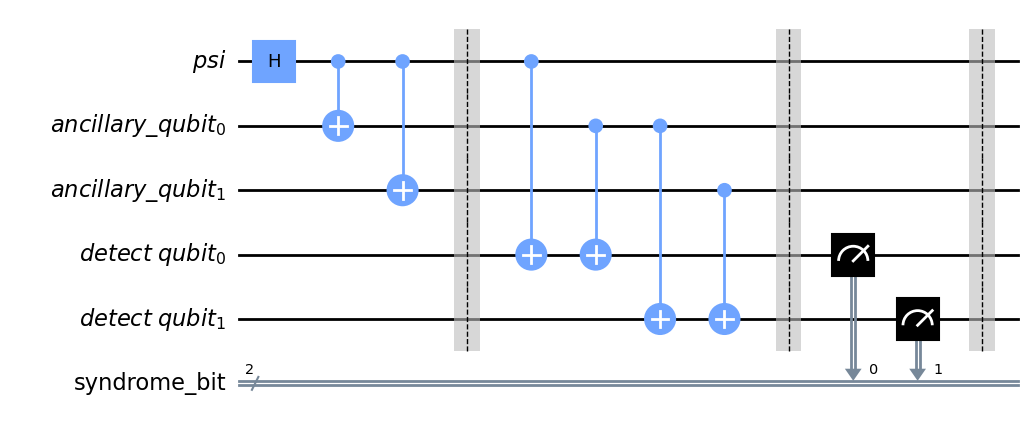

In [8]:
aq = QuantumRegister(2,'ancillary_qubit')
sb = ClassicalRegister(2,'syndrome_bit')
sq = QuantumRegister(2,'detect qubit')
init = QuantumRegister(1,'psi')
qc = QuantumCircuit(init,aq,sq,sb)
qc.h(init[0])
qc = bit_flip_encode(qc)
qc = error_area(qc)
qc = bit_flip_syndrome(qc)
qc = bit_flip_correct(qc)
qc.draw(output='mpl')

3-QUBIT PHASE FLIP CODE

In [6]:
def phase_flip_encode(qc):
    qc.cx(init[0],aq[0])
    qc.cx(init[0],aq[1])
    qc.h(init[0])
    qc.h(aq[0])
    qc.h(aq[1])
    qc.barrier()
    return qc
def error_area(qc):
    p = 0.4
    pc = random.random()
    if pc < p:
        qc.z(random.choice([aq[0],aq[1],init[0]]))
        qc.barrier()
    return qc
def phase_flip_syndrome(qc):
    qc.h(init[0])
    qc.h(aq[0])
    qc.h(aq[1])
    qc.barrier()
    qc.cx(init[0],sq[0])
    qc.cx(aq[0],sq[0])
    qc.cx(aq[0],sq[1])
    qc.cx(aq[1],sq[1])
    qc.barrier()
    qc.measure(sq[0],sb[0])
    qc.measure(sq[1],sb[1])
    qc.barrier()
    return qc

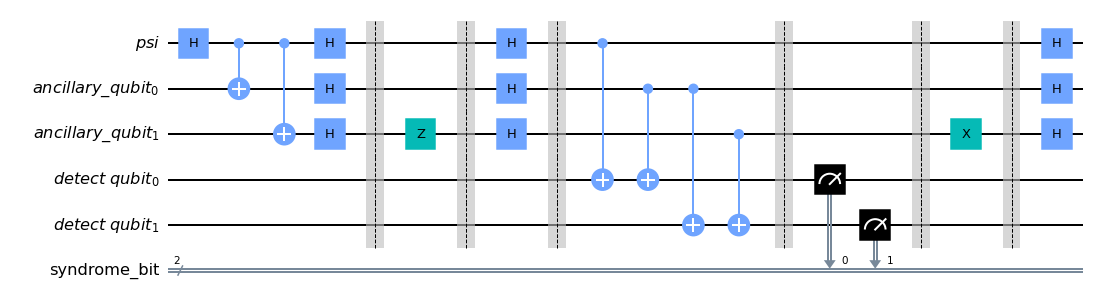

In [7]:
aq = QuantumRegister(2,'ancillary_qubit')
sb = ClassicalRegister(2,'syndrome_bit')
sq = QuantumRegister(2,'detect qubit')
init = QuantumRegister(1,'psi')
qc = QuantumCircuit(init,aq,sq,sb)
qc.h(init[0])
qc = phase_flip_encode(qc)
qc = error_area(qc)
qc = phase_flip_syndrome(qc)
qc = bit_flip_correct(qc)
qc.h([init[0],aq[0],aq[1]])
qc.draw(output='mpl')

Shor's 9-QUBIT CODE

In [8]:
def shor_code_encode(qc):
    qc.cx(init[0],block2[0])
    qc.cx(init[0],block3[0])
    qc.h([init[0],block2[0],block3[0]])
    qc.barrier()
    qc.cx(init[0],block1[0])
    qc.cx(init[0],block1[1])
    qc.cx(block2[0],block2[1])
    qc.cx(block2[0],block2[2])
    qc.cx(block3[0],block3[1])
    qc.cx(block3[0],block3[2])
    return qc
def error_area(qc):
    qc.barrier()
    qc.x(0)
    qc.z(0)
    qc.barrier()
    return qc
def error_correction(qc):
    qc.cx(init[0],block1[0])
    qc.cx(init[0],block1[1])
    qc.cx(block2[0],block2[1])
    qc.cx(block2[0],block2[2])
    qc.cx(block3[0],block3[1])
    qc.cx(block3[0],block3[2])
    qc.ccx(block1[1],block1[0],init[0])
    qc.ccx(block2[2],block2[1],block2[0])
    qc.ccx(block3[2],block3[1],block3[0])
    qc.h([init[0],block2[0],block3[0]])
    qc.cx(init[0],block2[0])
    qc.cx(init[0],block3[0])
    qc.ccx(block3[0],block2[0],init[0])
    return qc
    

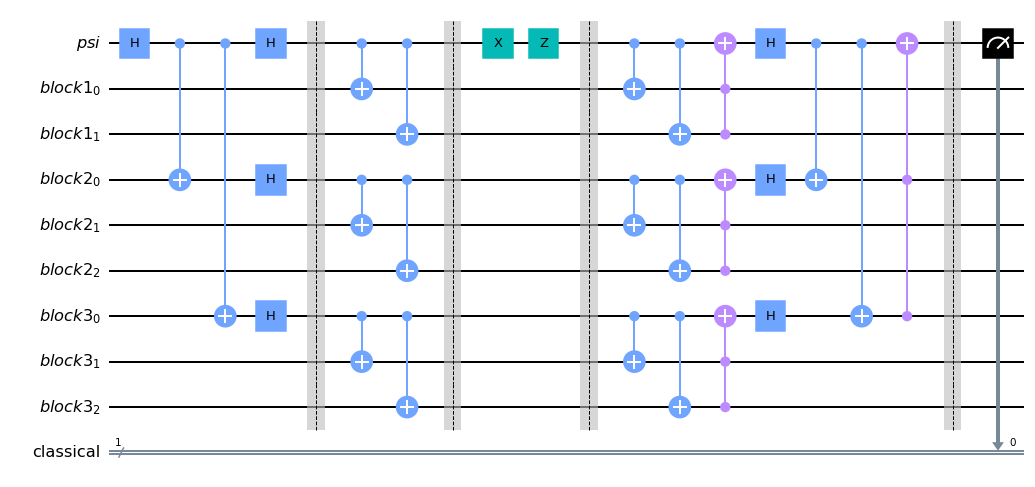

In [9]:
block2 = QuantumRegister(3,'block2')
init = QuantumRegister(1,'psi')
block1 = QuantumRegister(2,'block1')
block3 = QuantumRegister(3,'block3')
cb = ClassicalRegister(1,'classical')
qc = QuantumCircuit(init,block1,block2,block3,cb)
qc.h(0)
qc = shor_code_encode(qc)
qc = error_area(qc)
qc = error_correction(qc)
qc.barrier()
qc.measure(0,0)
qc.draw(output='mpl')

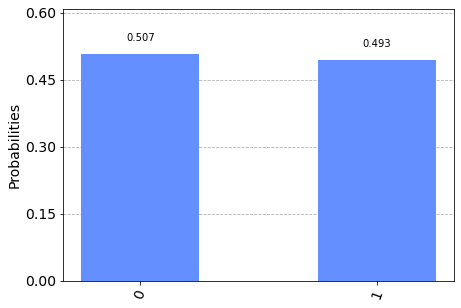

In [11]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

7-QUBIT Steane CODE, ENCODING CIRCUIT

In [12]:
def seven_qubit_encode(qc):
    qc.h(6)
    qc.h(5)
    qc.h(4)
    qc.cx(0,2)
    qc.cx(0,1)
    qc.barrier()
    qc.cx(6,3)
    qc.cx(6,1)
    qc.cx(6,0)
    qc.barrier()
    qc.cx(5,3)
    qc.cx(5,2)
    qc.cx(5,0)
    qc.barrier()
    qc.cx(4,3)
    qc.cx(4,2)
    qc.cx(4,1)
    qc.barrier()
    return qc

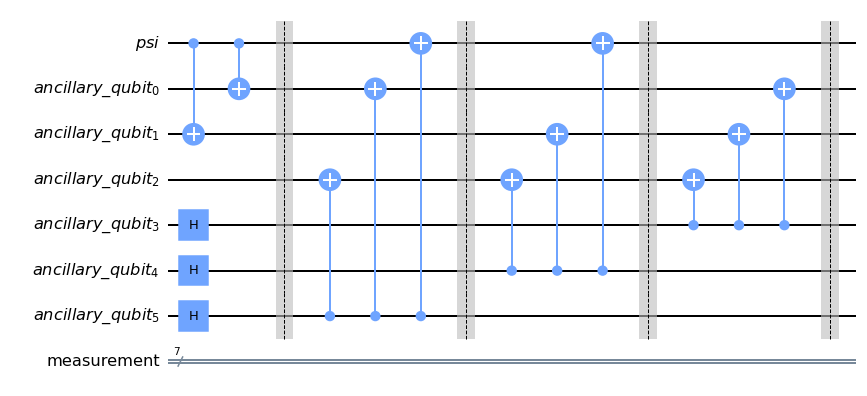

In [13]:
aq = QuantumRegister(6,'ancillary_qubit')
init = QuantumRegister(1,'psi')
cb = ClassicalRegister(7,'measurement')
qc = QuantumCircuit(init,aq,cb)
qc = seven_qubit_encode(qc)
qc.draw(output='mpl')

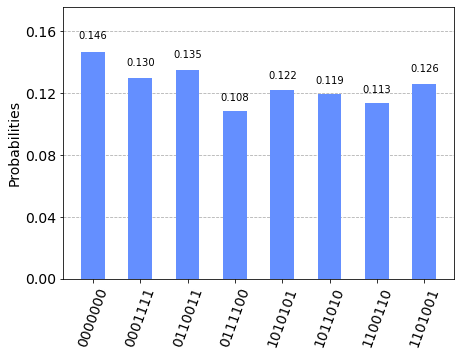

In [14]:
qc.measure([0,1,2,3,4,5,6],[6,5,4,3,2,1,0])
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

_________________________________________________________________________________
---------------------------------------------------------------------------------

5-QUBIT CODE ENCODING CIRCUIT 

In [15]:
#function from: https://quantumcomputing.stackexchange.com/questions/14264/nielsenchuang-5-qubit-quantum-error-correction-encoding-gate
def five_encode(circ):
    
    circ.h(4)
    circ.s(4)
    # g1
    circ.cz(4,3)
    circ.cz(4,1)
    circ.cy(4,0)
    circ.barrier()
    circ.h(3)
    #g2
    circ.cz(3,2)
    circ.cz(3,1)
    circ.cx(3,0)
    circ.barrier()
    circ.h(2)
    #g3
    circ.cz(2,4)
    circ.cz(2,3)
    circ.cx(2,0)
    circ.barrier()
    circ.h(1)
    circ.s(1)
    #g4
    circ.cz(1,4)
    circ.cz(1,2)
    circ.cy(1,0)
    return circ

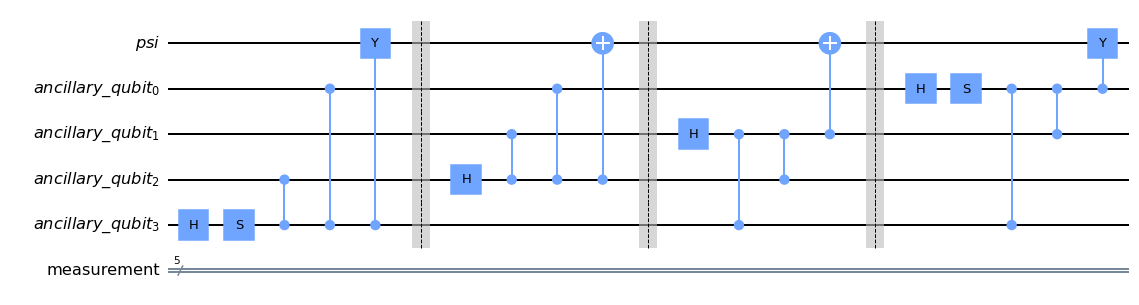

In [16]:
aq = QuantumRegister(4,'ancillary_qubit')
init = QuantumRegister(1,'psi')
cb = ClassicalRegister(5,'measurement')
qc1 = QuantumCircuit(init,aq,cb)
qc1 = five_encode(qc1)
qc1.draw(output='mpl')

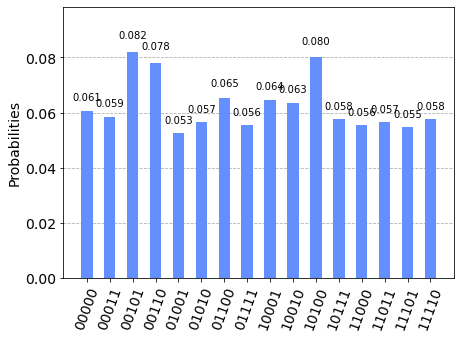

In [17]:
qc1.measure([0,1,2,3,4],[4,3,2,1,0])
qobj = assemble(qc1)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

Deutsch Algorithm with 9-qubit code

In [2]:
#1) constant function : f(x) = f(0) = f(1)

uf_const = QuantumCircuit(2, name = 'Uf') #f(0) = f(1) = 1
uf_const.x(1)
uf_const.to_gate()

error = QuantumCircuit(3, name = '!error!')
syndrome = random.choice(['x','z','xz','zx'])
m = random.choice([0,1,2])
if syndrome == 'x':
    syndrome = 'bit-flip error'
    error.x(m)
elif syndrome == 'z':
    syndrome = 'phase-flip error'
    error.z(m)
elif syndrome == 'xz':
    syndrome = 'bit-flip & phase-flip error'
    error.x(m)
    error.z(m)
elif syndrome == 'zx':
    syndrome = 'phase-flip & bit-flip error'
    error.z(m)
    error.x(m)
error.to_gate()
    
block2 = QuantumRegister(3)
init = QuantumRegister(1)
block1 = QuantumRegister(2)
block3 = QuantumRegister(3)
qc = QuantumCircuit(init,block1,block2,block3, name = 'encode')
qc.cx(init[0],block2[0])
qc.cx(init[0],block3[0])
qc.h([init[0],block2[0],block3[0]])
qc.barrier()
qc.cx(init[0],block1[0])
qc.cx(init[0],block1[1])
qc.cx(block2[0],block2[1])
qc.cx(block2[0],block2[2])
qc.cx(block3[0],block3[1])
qc.cx(block3[0],block3[2])

block2 = QuantumRegister(3)
init = QuantumRegister(1)
block1 = QuantumRegister(2)
block3 = QuantumRegister(3)
qc2 = QuantumCircuit(init,block1,block2,block3, name = 'correct')
qc2.cx(init[0],block1[0])
qc2.cx(init[0],block1[1])
qc2.cx(block2[0],block2[1])
qc2.cx(block2[0],block2[2])
qc2.cx(block3[0],block3[1])
qc2.cx(block3[0],block3[2])
qc2.ccx(block1[1],block1[0],init[0])
qc2.ccx(block2[2],block2[1],block2[0])
qc2.ccx(block3[2],block3[1],block3[0])
qc2.h([init[0],block2[0],block3[0]])
qc2.cx(init[0],block2[0])
qc2.cx(init[0],block3[0])
qc2.ccx(block3[0],block2[0],init[0])
qc2.to_gate()
    
block2 = QuantumRegister(3,'block2')
init = QuantumRegister(1,'x')
init2 = QuantumRegister(1,'psi')
block1 = QuantumRegister(2,'block1')
block3 = QuantumRegister(3,'block3')
cb = ClassicalRegister(1,'classical')
const_oracle = QuantumCircuit(init,init2,block1,block2,block3,cb)

const_oracle.i(0)
const_oracle.x(1)
const_oracle.h(0)
const_oracle.h(1)
const_oracle.append(qc,[0,2,3,4,5,6,7,8,9])
const_oracle.barrier()
const_oracle.append(uf_const,[0,1])
const_oracle.append(error,[0,4,7])
const_oracle.barrier()
const_oracle.append(qc2,[0,2,3,4,5,6,7,8,9])
const_oracle.h(0)

print(f"{syndrome} on qubit {m}")

phase-flip error on qubit 0


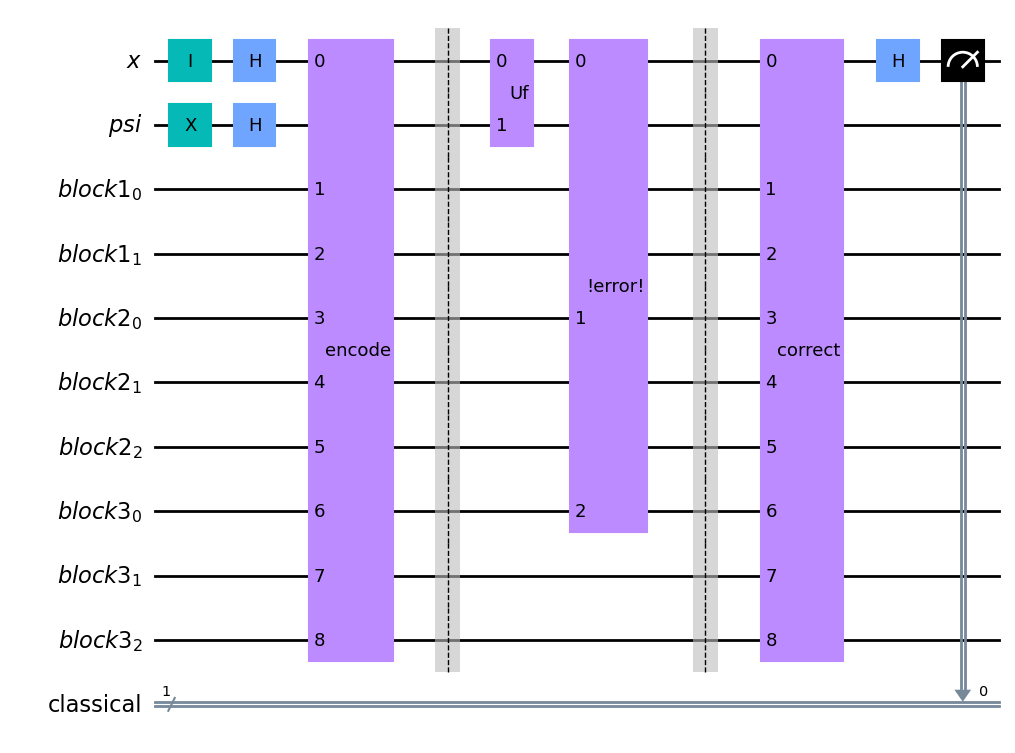

In [3]:
const_oracle.measure(init[0],cb[0])
const_oracle.draw(output='mpl')

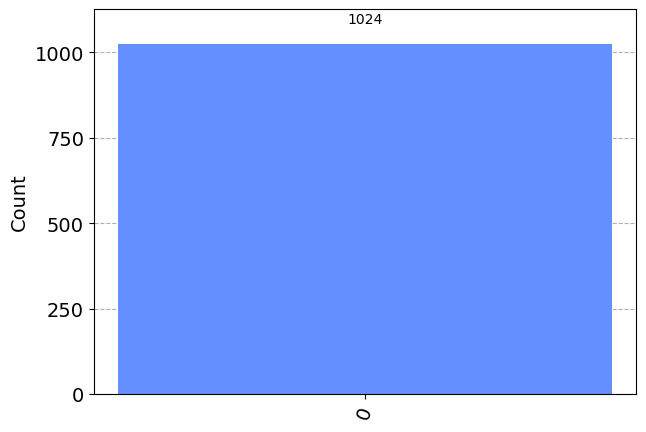

In [4]:
const_oracle = const_oracle.decompose()
qobj = assemble(const_oracle)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts() 
plot_histogram(counts)  # Display the output on measurement of state vector